In [9]:
import deepmatcher as dm
import pandas as pd 
from utilities_functions.intermediate_layer_extraction import Hook,return_layer_input_output
from deepmatcher.data import MatchingIterator
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt

## Create two different type of datasets

In [10]:
import random
import string

def randomString(stringLength):
    """Generate a random string with the combination of lowercase and uppercase letters """

    letters = string.ascii_letters
    return ''.join(random.choice(letters) for i in range(stringLength))

In [26]:
train_df = pd.read_csv('sample_data/itunes-amazon/train.csv')
valid_df = pd.read_csv('sample_data/itunes-amazon/validation.csv')
test_df = pd.read_csv('sample_data/itunes-amazon/test.csv')

In [27]:
def change_time_to_random(df,column):
    df[column] = df[column].apply(lambda c:randomString(len(c)+5))

In [28]:
change_time_to_random(train_df,'right_Time')
change_time_to_random(train_df,'left_Time')

In [29]:
change_time_to_random(valid_df,'left_Time')
change_time_to_random(valid_df,'right_Time')

In [30]:
change_time_to_random(test_df,'left_Time')
change_time_to_random(test_df,'right_Time')

In [66]:
train_df.to_csv('sample_data/itunes-amazon/exp5/train_with_randomtime.csv',index=False)
valid_df.to_csv('sample_data/itunes-amazon/valid_with_randomtime.csv',index=False)
test_df.to_csv('sample_data/itunes-amazon/test_with_randomtime.csv',index=False)

In [61]:
from random_word import RandomWords
r = RandomWords()
w = r.get_random_word(hasDictionaryDef="true", includePartOfSpeech="noun,verb")

In [63]:
def change_time_to_eng_word(df,column):
    df[column] = df[column].apply(lambda c: r.get_random_word(hasDictionaryDef="true", includePartOfSpeech="noun,verb"))

### Create fake time test samples

In [12]:
test = pd.read_csv('sample_data/itunes-amazon/test_with_naturalencoding.csv')

In [13]:
negative_samples = test[test['label']==0].copy()
negative_samples['left_Time']= negative_samples['right_Time']

In [14]:
negative_samples.to_csv('sample_data/itunes-amazon/neg_sample_fake_time_natencoding.csv',index=False)

In [15]:
negative_samples.shape

(77, 18)

### Bias testing

In [16]:
naturalencoding_hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')

In [17]:
naturalencoding_hybrid_model.load_state('naturalencoding_best.pth')
naturalencoding_hybrid_model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Song_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [18]:
unlabeled = dm.data.process_unlabeled('sample_data/itunes-amazon/neg_sample_fake_time_natencoding.csv'
                                      ,trained_model=naturalencoding_hybrid_model,ignore_columns=['label','id'])

In [20]:
predictions = naturalencoding_hybrid_model.run_prediction(unlabeled,output_attributes=True)

===>  PREDICT Epoch 8
Finished Epoch 8 || Run Time:    0.4 | Load Time:    0.3 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



In [21]:
predictions.head(10)

,match_score,label,left_Song_Name,left_Artist_Name,left_Album_Name,left_Genre,left_Price,left_CopyRight,left_Time,left_Released,right_Song_Name,right_Artist_Name,right_Album_Name,right_Genre,right_Price,right_CopyRight,right_Time,right_Released
id,,,,,,,,,,,,,,,,,,
28,0.262732,0,Lifted ( feat . Emeli Sand ' © & Professor Gre...,Naughty Boy,Hotel Cabana ( Deluxe Version ),"Pop , Music , Rock , R&B / Soul , Contemporary...",$ one point two nine,2013 Naughty Boy Recordings Ltd under exclusiv...,three and forty-two,6-May-14,La La La [ feat . Sam Smith ],Naughty Boy,Hotel Cabana [ Explicit ],Pop,$ one point two nine,( C ) 2014 Naughty Boy Recordings Ltd under ex...,three and forty-two,"May 6 , 2014"
438,0.989041,0,Songs Like This,Carrie Underwood,Play On,"Country , Music , Pop , Adult Contemporary , C...",$ one point two nine,"‰ ãÑ 2009 19 Recordings Limited , under exclus...",three and fifty-two,3-Nov-09,This Time,Carrie Underwood,Play On,Country,$ one point two nine,"( P ) 2009 19 Recordings Limited , under exclu...",three and fifty-two,"November 3 , 2009"
146,0.393988,0,Toyfriend ( feat . Wynter Gordon ) [ Continuou...,David Guetta,One Love ( Deluxe Version ),"Dance , Music",$ one point two nine,2010 Gum Prod licence exclusive Parlophone Mus...,three and twenty-three,21-Aug-09,Dangerous ( feat . Sam Martin ),David Guetta,Listen ( Deluxe ),Dance & Electronic,$ one point two nine,2015 If Moving Your Mine,three and twenty-three,"November 24 , 2014"
258,0.962564,0,O Little Town of Bethlehem,Kenny Chesney,All I Want for Christmas Is a Real Good Tan,"Holiday , Music , Country , Honky Tonk , Conte...",$ zero point nine nine,2003 BMG Music,three and four,4-Oct-03,Sweet Little Jesus Boy,Kenny Rogers,Christmas Greetings,"Holiday , Christmas , Miscellaneous",$ one point two nine,"( C ) 2000 Capitol Records , LLC",three and four,"August 17 , 2000"
266,0.446089,0,Whateva ( feat . Monty ),Fetty Wap,Fetty Wap ( Deluxe ),"Hip-Hop/Rap , Music , Rap",Album Only,2015 300 Entertainment/RGF Productions,three and twenty-eight,NaN,For My Team ( feat . Monty ) [ Clean ],Fetty Wap,Fetty Wap ( Deluxe ) [ Clean ],Rap & Hip-Hop,$ one point two nine,"( C ) 2000 Mute Records Ltd. , a BMG Company ,...",three and twenty-eight,"September 25 , 2015"
237,0.775423,0,If I Am a Stranger ( Live In Amsterdam ),Ryan Adams,Live After Deaf ( Live ) [ Complete Collection ],"Singer/Songwriter , Music , Rock",$ zero point nine nine,2012 PAXAM RECORDS,three and seventeen,2-Jul-12,Firecracker ( Live in Amsterdam ),Ryan Adams,Live After Deaf ( Amsterdam ),"Folk , Rock",$ zero point nine nine,2012 PAXAM RECORDS,three and seventeen,"July 2 , 2012"
205,0.578722,0,Second Chance ( Live Acoustic from Kansas City ),Shinedown,Somewhere In the Stratosphere ( Live ),"Rock , Music , Metal , Alternative , Hard Rock",$ one point two nine,2011 Atlantic Recording Corporation for the Un...,eight and nine,18-Apr-11,Heroes ( Live Acoustic From Kansas City ),Shinedown,Somewhere In The Stratosphere,Rock,$ one point two nine,( C ) 2005 MCA Nashville,eight and nine,"April 18 , 2011"
10,0.577982,0,VHS Outro ( Interlude ),X Ambassadors,VHS,"Alternative , Music , Rock , Adult Alternative",$ one point two nine,2015 KIDinaKORNER/Interscope Records,zero and twenty-four,30-Jun-15,Smoke ( Interlude ) [ Explicit ],X Ambassadors,VHS [ Explicit ],Alternative Rock,$ one point two nine,( C ) 2015 KIDinaKORNER/Interscope Records,zero and twenty-four,"June 30 , 2015"
144,0.318990,0,Toyfriend ( feat . Wynter Gordon ) [ Continuou...,David Guetta,One Love ( Deluxe Version ),"Dance , Music",$ one point two nine,2010 Gum Prod licence exclusive Parlophone Mus...,three and forty-five,21-Aug-09,Crossroads ( Album Version ( Edited ) ) [ feat...,David Banner,Certified ( Edited Version ),Rap & Hip-Hop,$ zero point nine nine,"( C ) 2014 Island Records , a division of UMG ...",three and forty-five,"September 20 , 2005"


In [8]:
predictions.to_csv('prediction_test_negatives_altered_time.csv')

In [22]:
right_predictions = predictions[predictions['match_score']<=0.5]

In [23]:
right_predictions.shape

(35, 18)

## Model trained on standard dataset

In [32]:
hybrid_model = dm.MatchingModel(attr_summarizer='hybrid')

In [33]:
hybrid_model.load_state('models/hybrid_model.pth')
hybrid_model.cuda()

MatchingModel(
  (attr_summarizers): ModuleMap(
    (Song_Name): Hybrid(
      (word_contextualizer): RNN(
        (rnn_groups): ModuleList(
          (0): GRU(300, 150, batch_first=True, bidirectional=True)
        )
        (dropouts): ModuleList(
          (0): Dropout(p=0)
        )
        (bypass_networks): ModuleList(
          (0): None
        )
        (input_dropout): NoMeta(
          (module): Dropout(p=0)
        )
      )
      (word_comparator): Attention(
        (alignment_networks): ModuleList(
          (0): AlignmentNetwork(
            (transform): Transform(
              (transforms): ModuleList(
                (0): Linear(in_features=300, out_features=300, bias=True)
                (1): Linear(in_features=300, out_features=300, bias=True)
              )
              (bypass_networks): ModuleList(
                (0): Bypass(
                  (highway_gate): Linear(in_features=300, out_features=300, bias=True)
                )
                (1): Bypass(


In [13]:
unlabeled = dm.data.process_unlabeled('sample_data/itunes-amazon/test_negatives_same_time.csv',
                                      trained_model=hybrid_model,ignore_columns=['label'])

In [14]:
predictions = hybrid_model.run_prediction(unlabeled)

===>  PREDICT Epoch 2
Finished Epoch 2 || Run Time:    0.4 | Load Time:    0.2 || F1:   0.00 | Prec:   0.00 | Rec:   0.00 || Ex/s:   0.00



In [15]:
right_predictions = predictions[predictions['match_score']<=0.5]
right_predictions.shape

(11, 1)

## Check time encoding in the two models

### Numeric encoding

In [34]:
data_dir = 'sample_data/itunes-amazon/'
datasets = dm.data.process(path=data_dir,train='negative_samples.csv',validation='positive_samples.csv',
                           test='test.csv',cache='exp5-first.pth')

In [35]:
batch_size = 32
splits = MatchingIterator.splits(datasets,batch_size=batch_size)

In [36]:
negative_batches = []
for bat in splits[0]:
    negative_batches.append(bat)

In [37]:
positive_batches = []
for bat in splits[1]:
    positive_batches.append(bat)

In [39]:
hookF_time = [Hook(hybrid_model.attr_summarizers.Time)]

In [40]:
positive_time_inputs = []
positive_time_outputs = []
for batch in positive_batches:
    pos_input, pos_output = return_layer_input_output(hookF_time,batch,hybrid_model)
    positive_time_inputs.append(pos_input)
    positive_time_outputs.append(pos_output)

In [41]:
negative_time_inputs = []
negative_time_outputs = []
for batch in negative_batches:
    neg_inp, neg_output = return_layer_input_output(hookF_time,batch,hybrid_model)
    negative_time_inputs.append(neg_inp)
    negative_time_outputs.append(neg_output)

In [45]:
positive_time_left_inputs = list(map(lambda x: x[0][0][0],positive_time_inputs))
positive_time_right_inputs = list(map(lambda x:x[0][1][0],positive_time_inputs))

In [46]:
positive_time_left_outputs = list(map(lambda x: x[0][0][0],positive_time_outputs))
positive_time_right_outputs = list(map(lambda x:x[0][1][0],positive_time_outputs))

In [47]:
negative_time_left_inputs = list(map(lambda x: x[0][0][0],negative_time_inputs))
negative_time_right_inputs = list(map(lambda x:x[0][1][0],negative_time_inputs))

In [48]:
negative_time_left_outputs = list(map(lambda x: x[0][0][0],negative_time_outputs))
negative_time_right_outputs = list(map(lambda x:x[0][1][0],negative_time_outputs))

In [49]:
distance_values_negatives_standardencoding = []
for l_batch,r_batch in zip(negative_time_left_inputs,negative_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_standardencoding.append(euclidean(l_encoding[1].data,r_encoding[1].data))

In [50]:
distance_values_negatives_standardencoding_summarizer = []
for l_batch,r_batch in zip(negative_time_left_outputs,negative_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_standardencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [51]:
distance_values_positives_standardencoding = []
for l_batch,r_batch in zip(positive_time_left_inputs,positive_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_standardencoding.append(euclidean(l_encoding[1].data,r_encoding[1].data))

In [52]:
distance_values_positives_standardencoding_summarizer = []
for l_batch,r_batch in zip(positive_time_left_outputs,positive_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_standardencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [54]:
distance_negatives_standardencoding = pd.DataFrame(data = distance_values_negatives_standardencoding,columns=['distance'])
distance_negatives_standardencoding.to_csv('experiments-results/exp5/distance_negatives_standardencoding.csv',index=False)

In [55]:
distance_negatives_standardencoding_summarizer = pd.DataFrame(
    data = distance_values_negatives_standardencoding_summarizer,columns=['distance'])
distance_negatives_standardencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_negatives_standardencoding_summarizer.csv',index=False)

In [56]:
distance_positives_standardencoding = pd.DataFrame(data = distance_values_negatives_standardencoding,columns = ['distance'])
distance_positives_standardencoding.to_csv('experiments-results/exp5/distance_positives_standardencoding.csv',index=False)

In [57]:
distance_positives_standardencoding_summarizer = pd.DataFrame(
    data = distance_values_positives_standardencoding_summarizer,columns = ['distance'])

distance_positives_standardencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_positives_standardencoding_summarizer.csv',index=False)

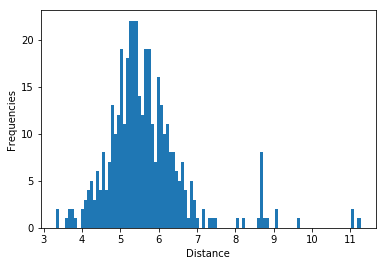

In [58]:
x = distance_values_negatives_standardencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel("Distance")
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_standardencoding.png')

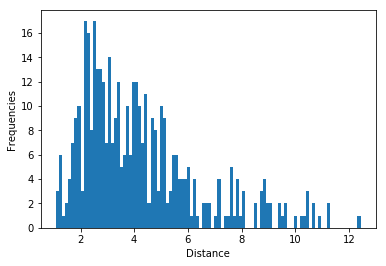

In [59]:
x = distance_values_negatives_standardencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel("Distance")
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_standardencoding_summarizer.png')

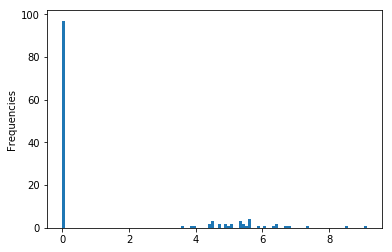

In [60]:
x = distance_values_positives_standardencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
plt.savefig('distance_values_positives_standardencoding.png')

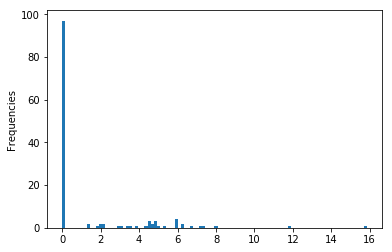

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
x = distance_values_positives_standardencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
plt.savefig('distance_values_positives_standardencoding_summarizer.png')

### String encoding for numeric values

In [62]:
data_dir = 'sample_data/itunes-amazon/'
datasets = dm.data.process(path=data_dir,train='negative_samples_naturalencoding.csv',validation='positive_samples_naturalencoding.csv',
                           test='test.csv',cache='exp5-second.pth')

In [63]:
batch_size = 32
splits = MatchingIterator.splits(datasets,batch_size=batch_size)

In [64]:
negative_batches = []
for bat in splits[0]:
    negative_batches.append(bat)

In [65]:
positive_batches = []
for bat in splits[1]:
    positive_batches.append(bat)

In [67]:
hookF_time = [Hook(naturalencoding_hybrid_model.attr_summarizers.Time)]

In [68]:
positive_time_inputs = []
positive_time_outputs = []
for batch in positive_batches:
    pos_input, pos_output = return_layer_input_output(hookF_time,batch,naturalencoding_hybrid_model)
    positive_time_inputs.append(pos_input)
    positive_time_outputs.append(pos_output)

In [69]:
negative_time_inputs = []
negative_time_outputs = []
for batch in negative_batches:
    neg_inp, neg_output = return_layer_input_output(hookF_time,batch,naturalencoding_hybrid_model)
    negative_time_inputs.append(neg_inp)
    negative_time_outputs.append(neg_output)

In [70]:
positive_time_left_inputs = list(map(lambda x: x[0][0][0],positive_time_inputs))
positive_time_right_inputs = list(map(lambda x:x[0][1][0],positive_time_inputs))

In [71]:
positive_time_left_outputs = list(map(lambda x: x[0][0][0],positive_time_outputs))
positive_time_right_outputs = list(map(lambda x:x[0][1][0],positive_time_outputs))

In [72]:
negative_time_left_inputs = list(map(lambda x: x[0][0][0],negative_time_inputs))
negative_time_right_inputs = list(map(lambda x:x[0][1][0],negative_time_inputs))

In [73]:
negative_time_left_outputs = list(map(lambda x: x[0][0][0],negative_time_outputs))
negative_time_right_outputs = list(map(lambda x:x[0][1][0],negative_time_outputs))

In [74]:
distance_values_negatives_naturalencoding = []
for l_batch,r_batch in zip(negative_time_left_inputs,negative_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_naturalencoding.append(euclidean(l_encoding.view(-1).data,r_encoding.view(-1).data))

In [75]:
distance_values_negatives_naturalencoding_summarizer = []
for l_batch,r_batch in zip(negative_time_left_outputs,negative_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_negatives_naturalencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [76]:
distance_values_positives_naturalencoding = []
for l_batch,r_batch in zip(positive_time_left_inputs,positive_time_right_inputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_naturalencoding.append(euclidean(l_encoding.view(-1).data,r_encoding.view(-1).data))

In [77]:
distance_values_positives_naturalencoding_summarizer = []
for l_batch,r_batch in zip(positive_time_left_outputs,positive_time_right_outputs):
    for l_encoding,r_encoding in zip(l_batch,r_batch):
        distance_values_positives_naturalencoding_summarizer.append(euclidean(l_encoding.data,r_encoding.data))

In [78]:
c = ['distance']
distance_negatives_naturalencoding = pd.DataFrame(data = distance_values_negatives_naturalencoding,columns=c)
distance_negatives_naturalencoding.head()
distance_negatives_naturalencoding.to_csv('experiments-results/exp5/distance_negatives_naturalencoding.csv',index=False)

In [79]:
distance_negatives_naturalencoding_summarizer = pd.DataFrame(
    data = distance_values_negatives_naturalencoding_summarizer,columns= c)
distance_negatives_naturalencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_negatives_naturalencoding_summarizer.csv')

In [80]:
distance_positives_naturalencoding = pd.DataFrame(data = distance_values_positives_naturalencoding, columns = c)
distance_positives_naturalencoding.head(10)
distance_negatives_naturalencoding.to_csv('experiments-results/exp5/distance_positives_naturalencoding.csv',index=False)

In [81]:
distance_positives_naturalencoding_summarizer = pd.DataFrame(
    data = distance_values_positives_naturalencoding_summarizer,columns= c)
distance_positives_naturalencoding_summarizer.to_csv(
    'experiments-results/exp5/distance_positives_naturalencoding_summarizer.csv',index= False)

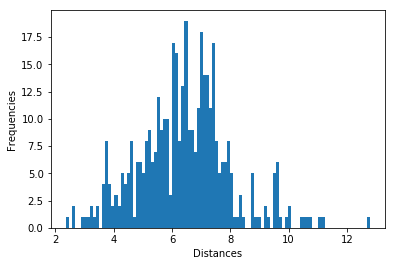

In [82]:
x = distance_values_negatives_naturalencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel('Distances')
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_naturalencoding.png')

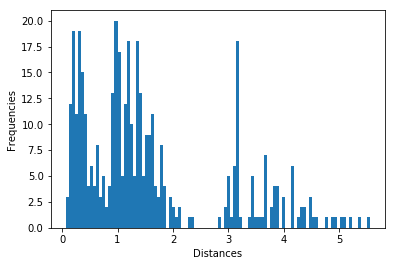

In [83]:
x = distance_values_negatives_naturalencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.xlabel('Distances')
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_negatives_naturalencoding_summarizer.png')

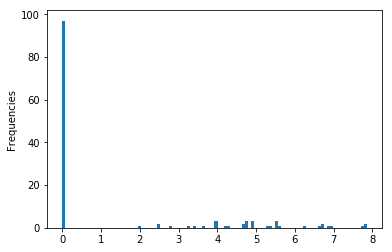

In [84]:
x = distance_values_positives_naturalencoding
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_positives_naturalencoding.png')

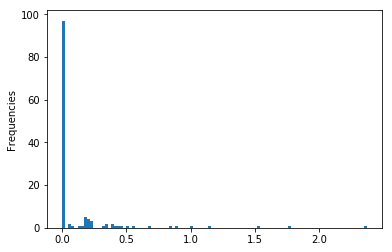

In [85]:
x = distance_values_positives_naturalencoding_summarizer
fig = plt.figure()
plt.hist(x, bins=100)
plt.ylabel('Frequencies')
#plt.show()
fig.savefig('distance_values_positives_naturalencoding_summarizer.png')

In [47]:
distance_values_positives_naturalencoding[2]

4.6885881423950195

In [48]:
distance_values_positives_standardencoding[2]

5.424941062927246